In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/ToBig's/assignments/EDA/WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [ ]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
data.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

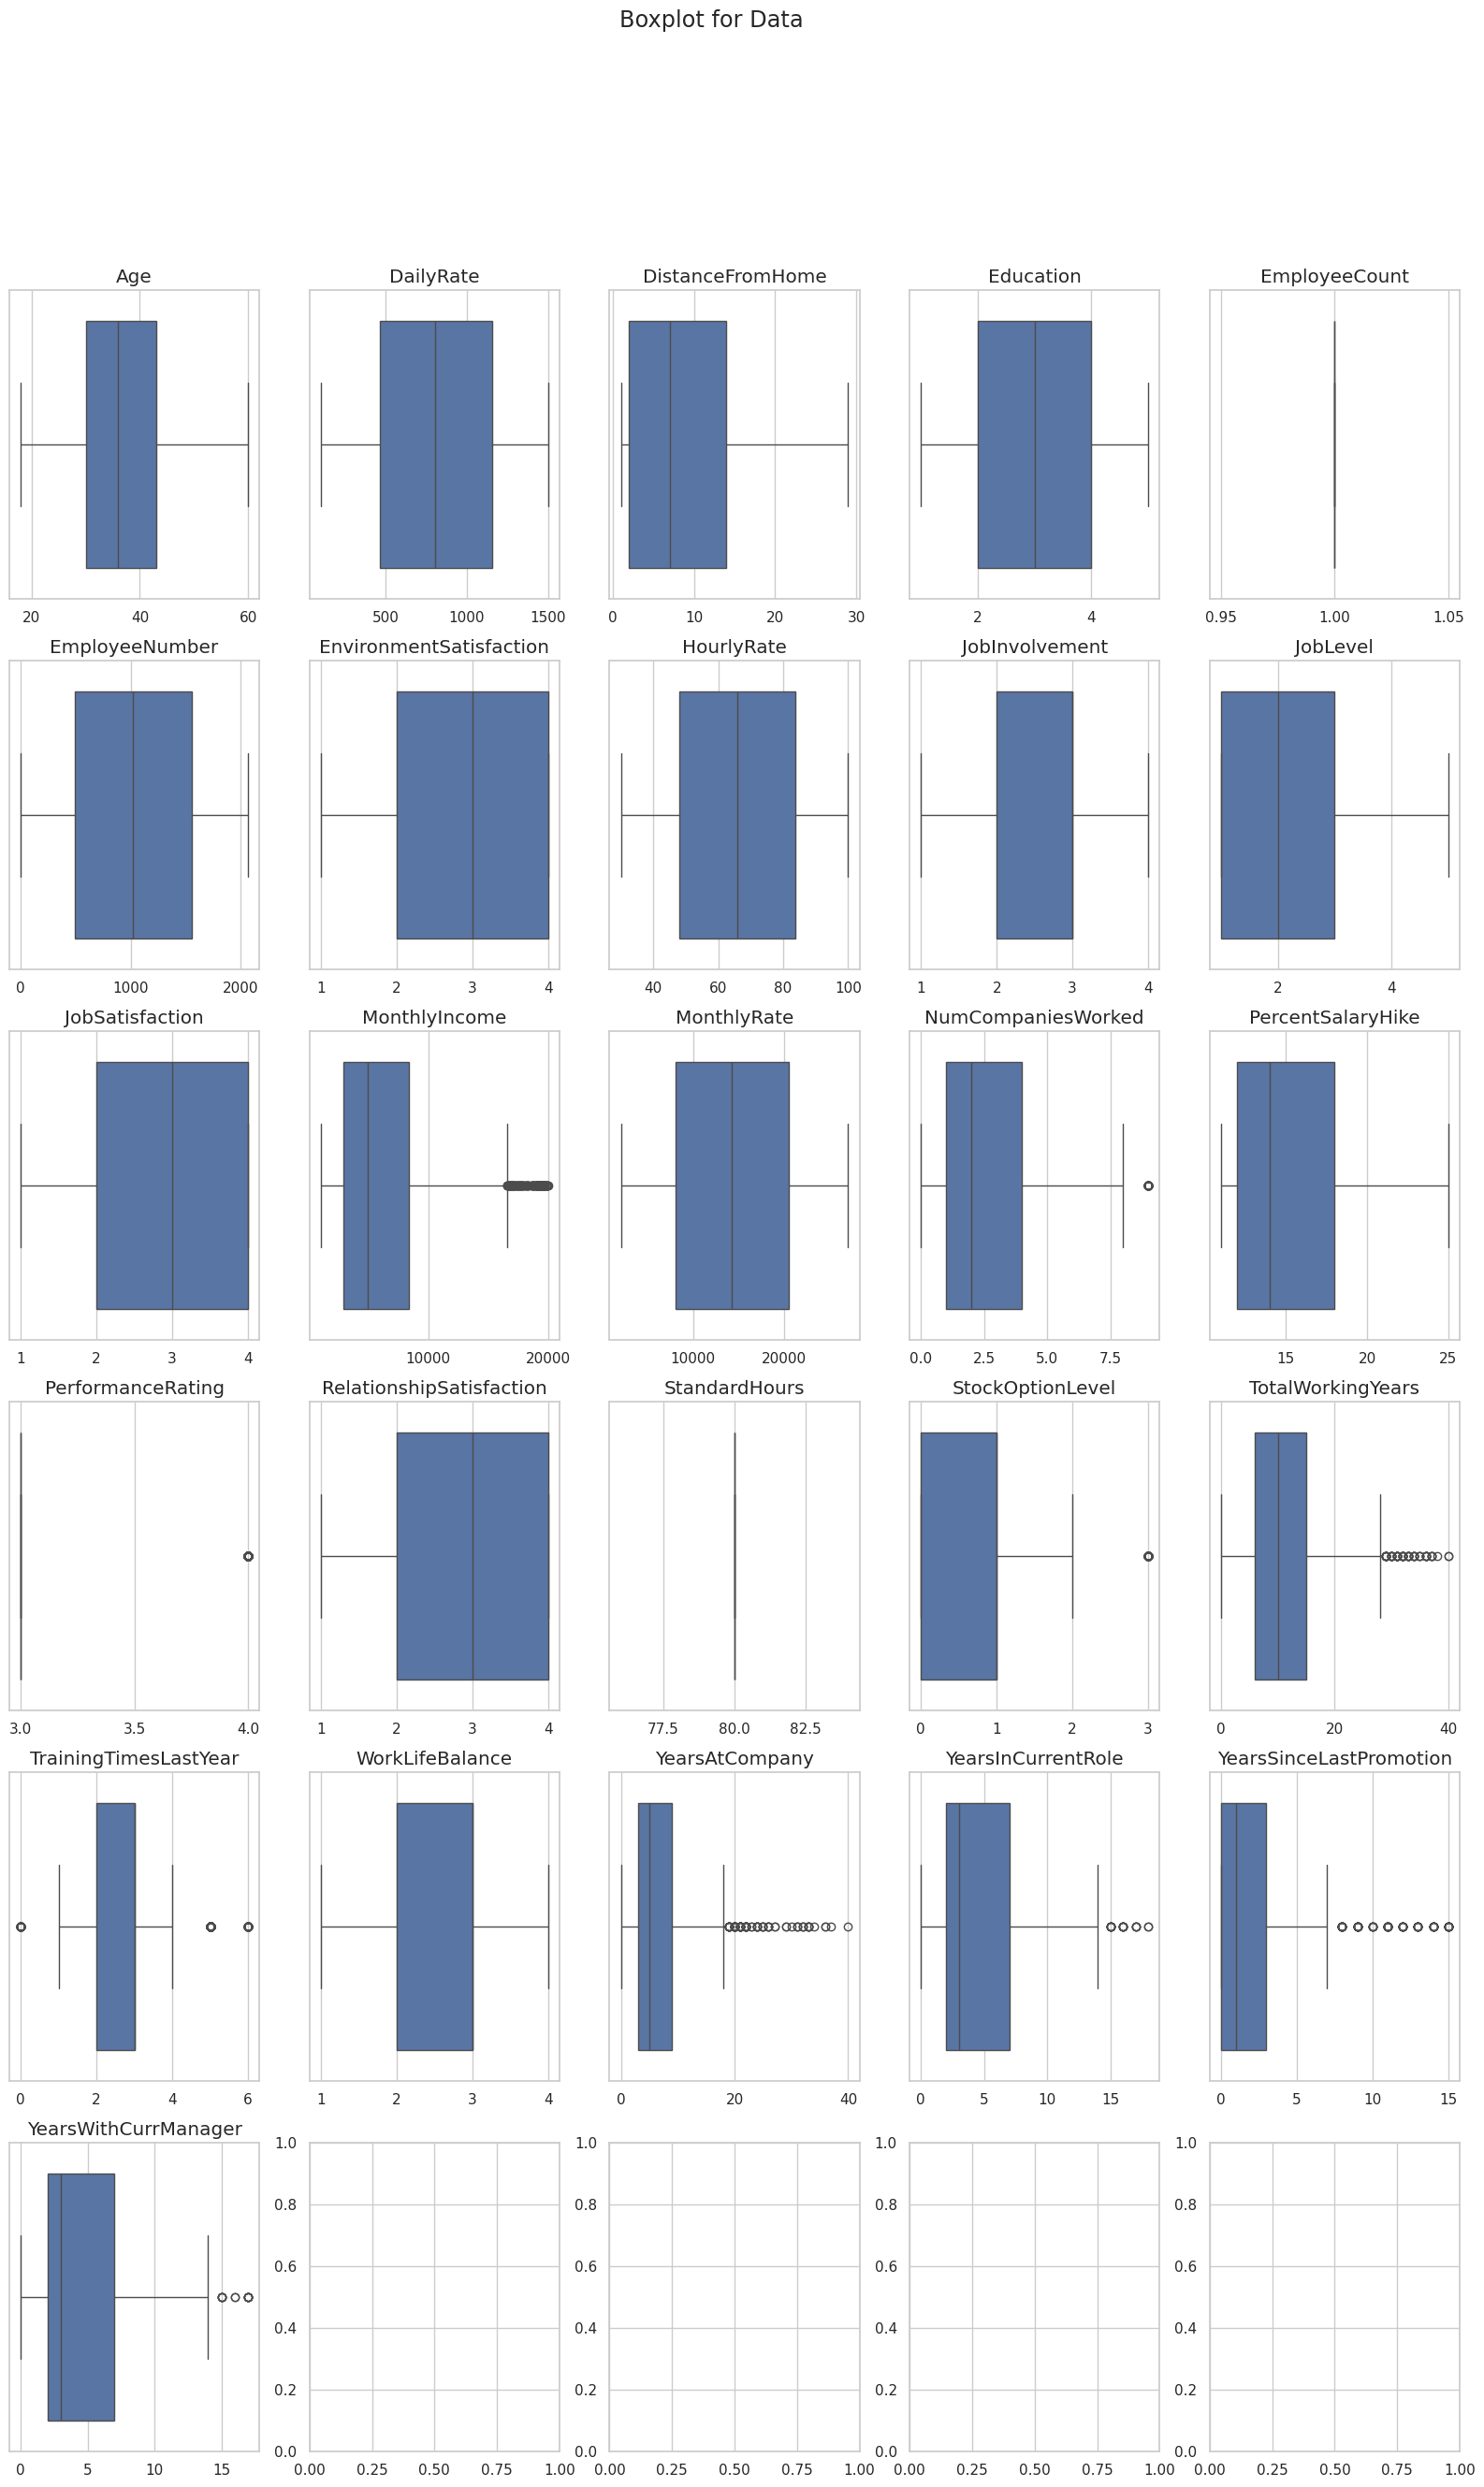

In [ ]:
numerical_vars = data.select_dtypes(include=['int64']).columns.tolist()

# 계산하여 subplot의 행, 열 개수 정하기
n_rows = len(numerical_vars) // 5 + 1
n_cols = len(numerical_vars) % 5

sns.set(style="whitegrid")
fig, ax = plt.subplots(nrows=n_rows, ncols=5, figsize=(20, 5 * n_rows))
sns.set(font_scale=1.2)

for var, col in enumerate(numerical_vars):
    r = var // 5
    c = var % 5
    sns.boxplot(x=data[col], ax=ax[r][c])
    ax[r][c].set_title(col)  # 각 subplot 위에 변수명 추가
    ax[r][c].set_xlabel('')  # x축 라벨 삭제


fig.suptitle('Boxplot for Data')

# 그래프 표시
plt.show()

In [ ]:
# 이상치 비율 출력

for var in numerical_vars:
  q1 = data[var].quantile(0.25)
  q3 = data[var].quantile(0.75)

# 이상치 확인 및 비율 계산
  outliers = []
  for value in data[var]:
      if value < q1 - 1.5 * (q3 - q1) or value > q3 + 1.5 * (q3 - q1):
          outliers.append(value)

  outlier_percentage = len(outliers) / len(data[var]) * 100

  if outlier_percentage > 0:
    print(f"{var} Outlier Percentage: {outlier_percentage:.2f}%")

MonthlyIncome Outlier Percentage: 7.76%
NumCompaniesWorked Outlier Percentage: 3.54%
PerformanceRating Outlier Percentage: 15.37%
StockOptionLevel Outlier Percentage: 5.78%
TotalWorkingYears Outlier Percentage: 4.29%
TrainingTimesLastYear Outlier Percentage: 16.19%
YearsAtCompany Outlier Percentage: 7.07%
YearsInCurrentRole Outlier Percentage: 1.43%
YearsSinceLastPromotion Outlier Percentage: 7.28%
YearsWithCurrManager Outlier Percentage: 0.95%


<Axes: >

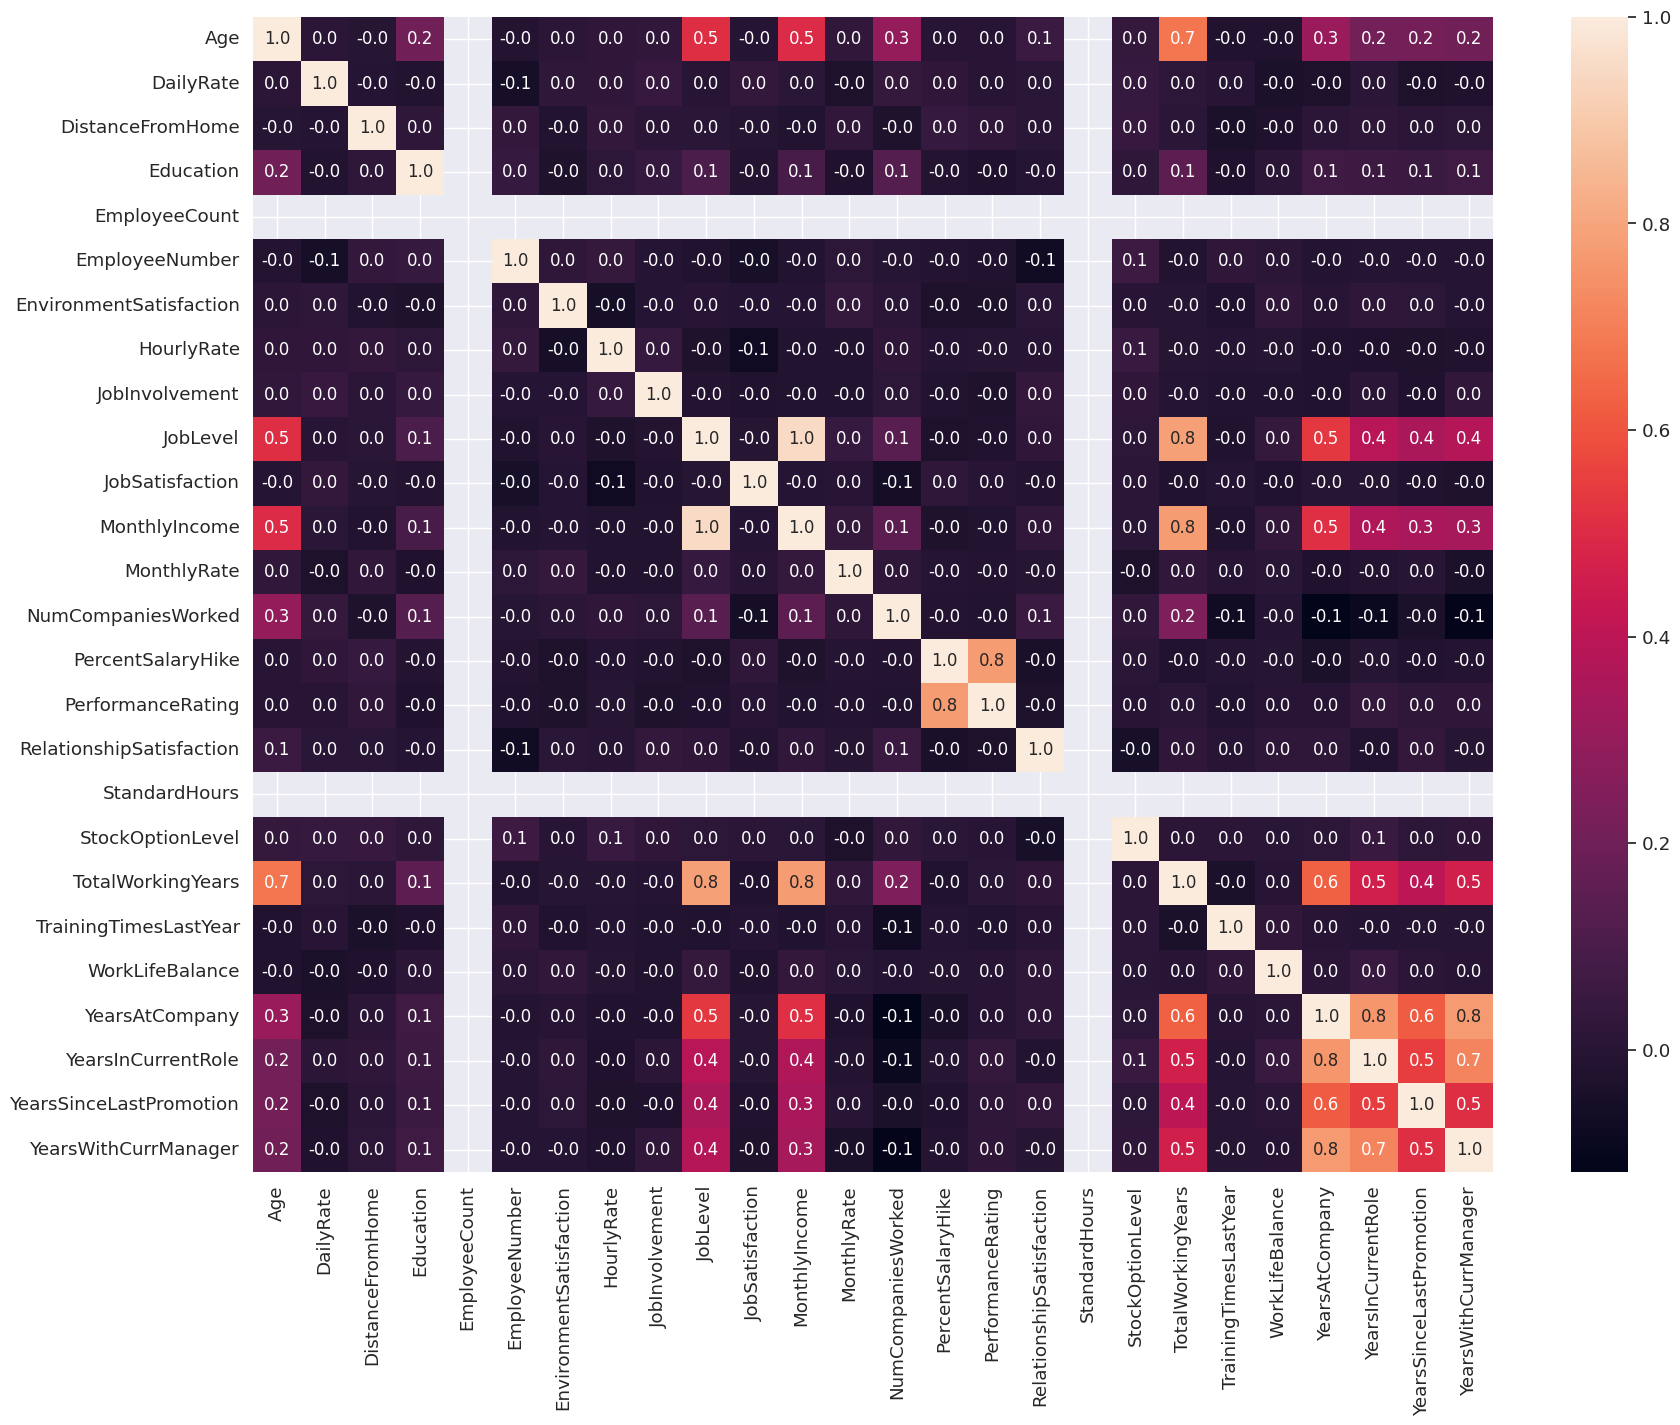

In [ ]:
sns.set(font_scale=1.2)
plt.figure(figsize=(20, 15))
sns.heatmap(data[numerical_vars].corr(), annot=True, fmt='.1f', annot_kws={'size':12})

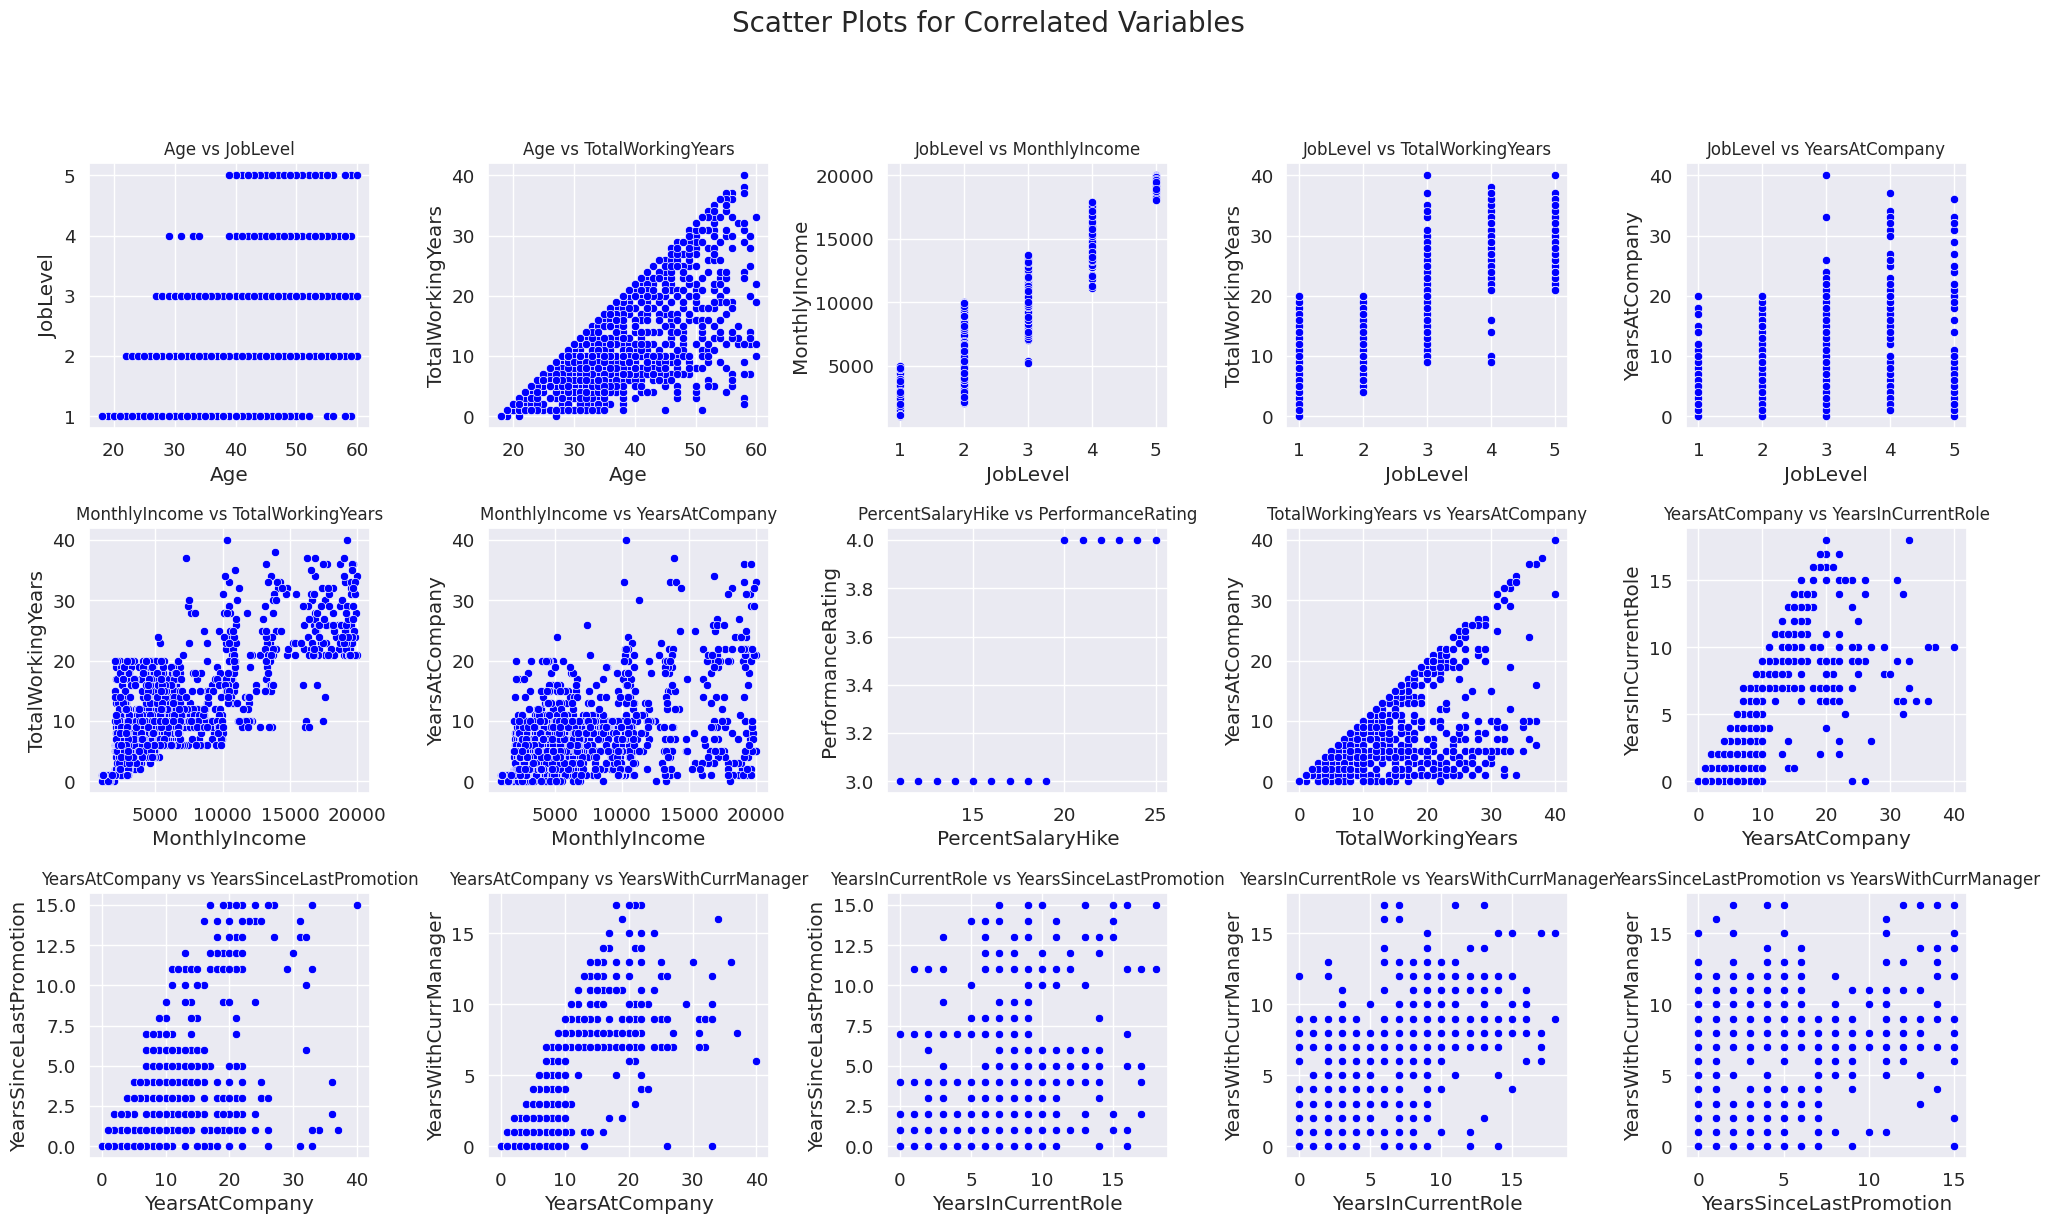

In [ ]:
correlation_matrix = data[numerical_vars].corr()

fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(20, 20))
fig.suptitle('Scatter Plots for Correlated Variables', fontsize=20)

axs = axs.flatten()

threshold = 0.5
count = 0

for i in range(len(numerical_vars)):
    for j in range(i + 1, len(numerical_vars)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            sns.scatterplot(x=data[numerical_vars[i]], y=data[numerical_vars[j]], ax=axs[count], color='blue')
            axs[count].set_title(f'{numerical_vars[i]} vs {numerical_vars[j]}', fontsize=12)
            count += 1

for i in range(count, len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

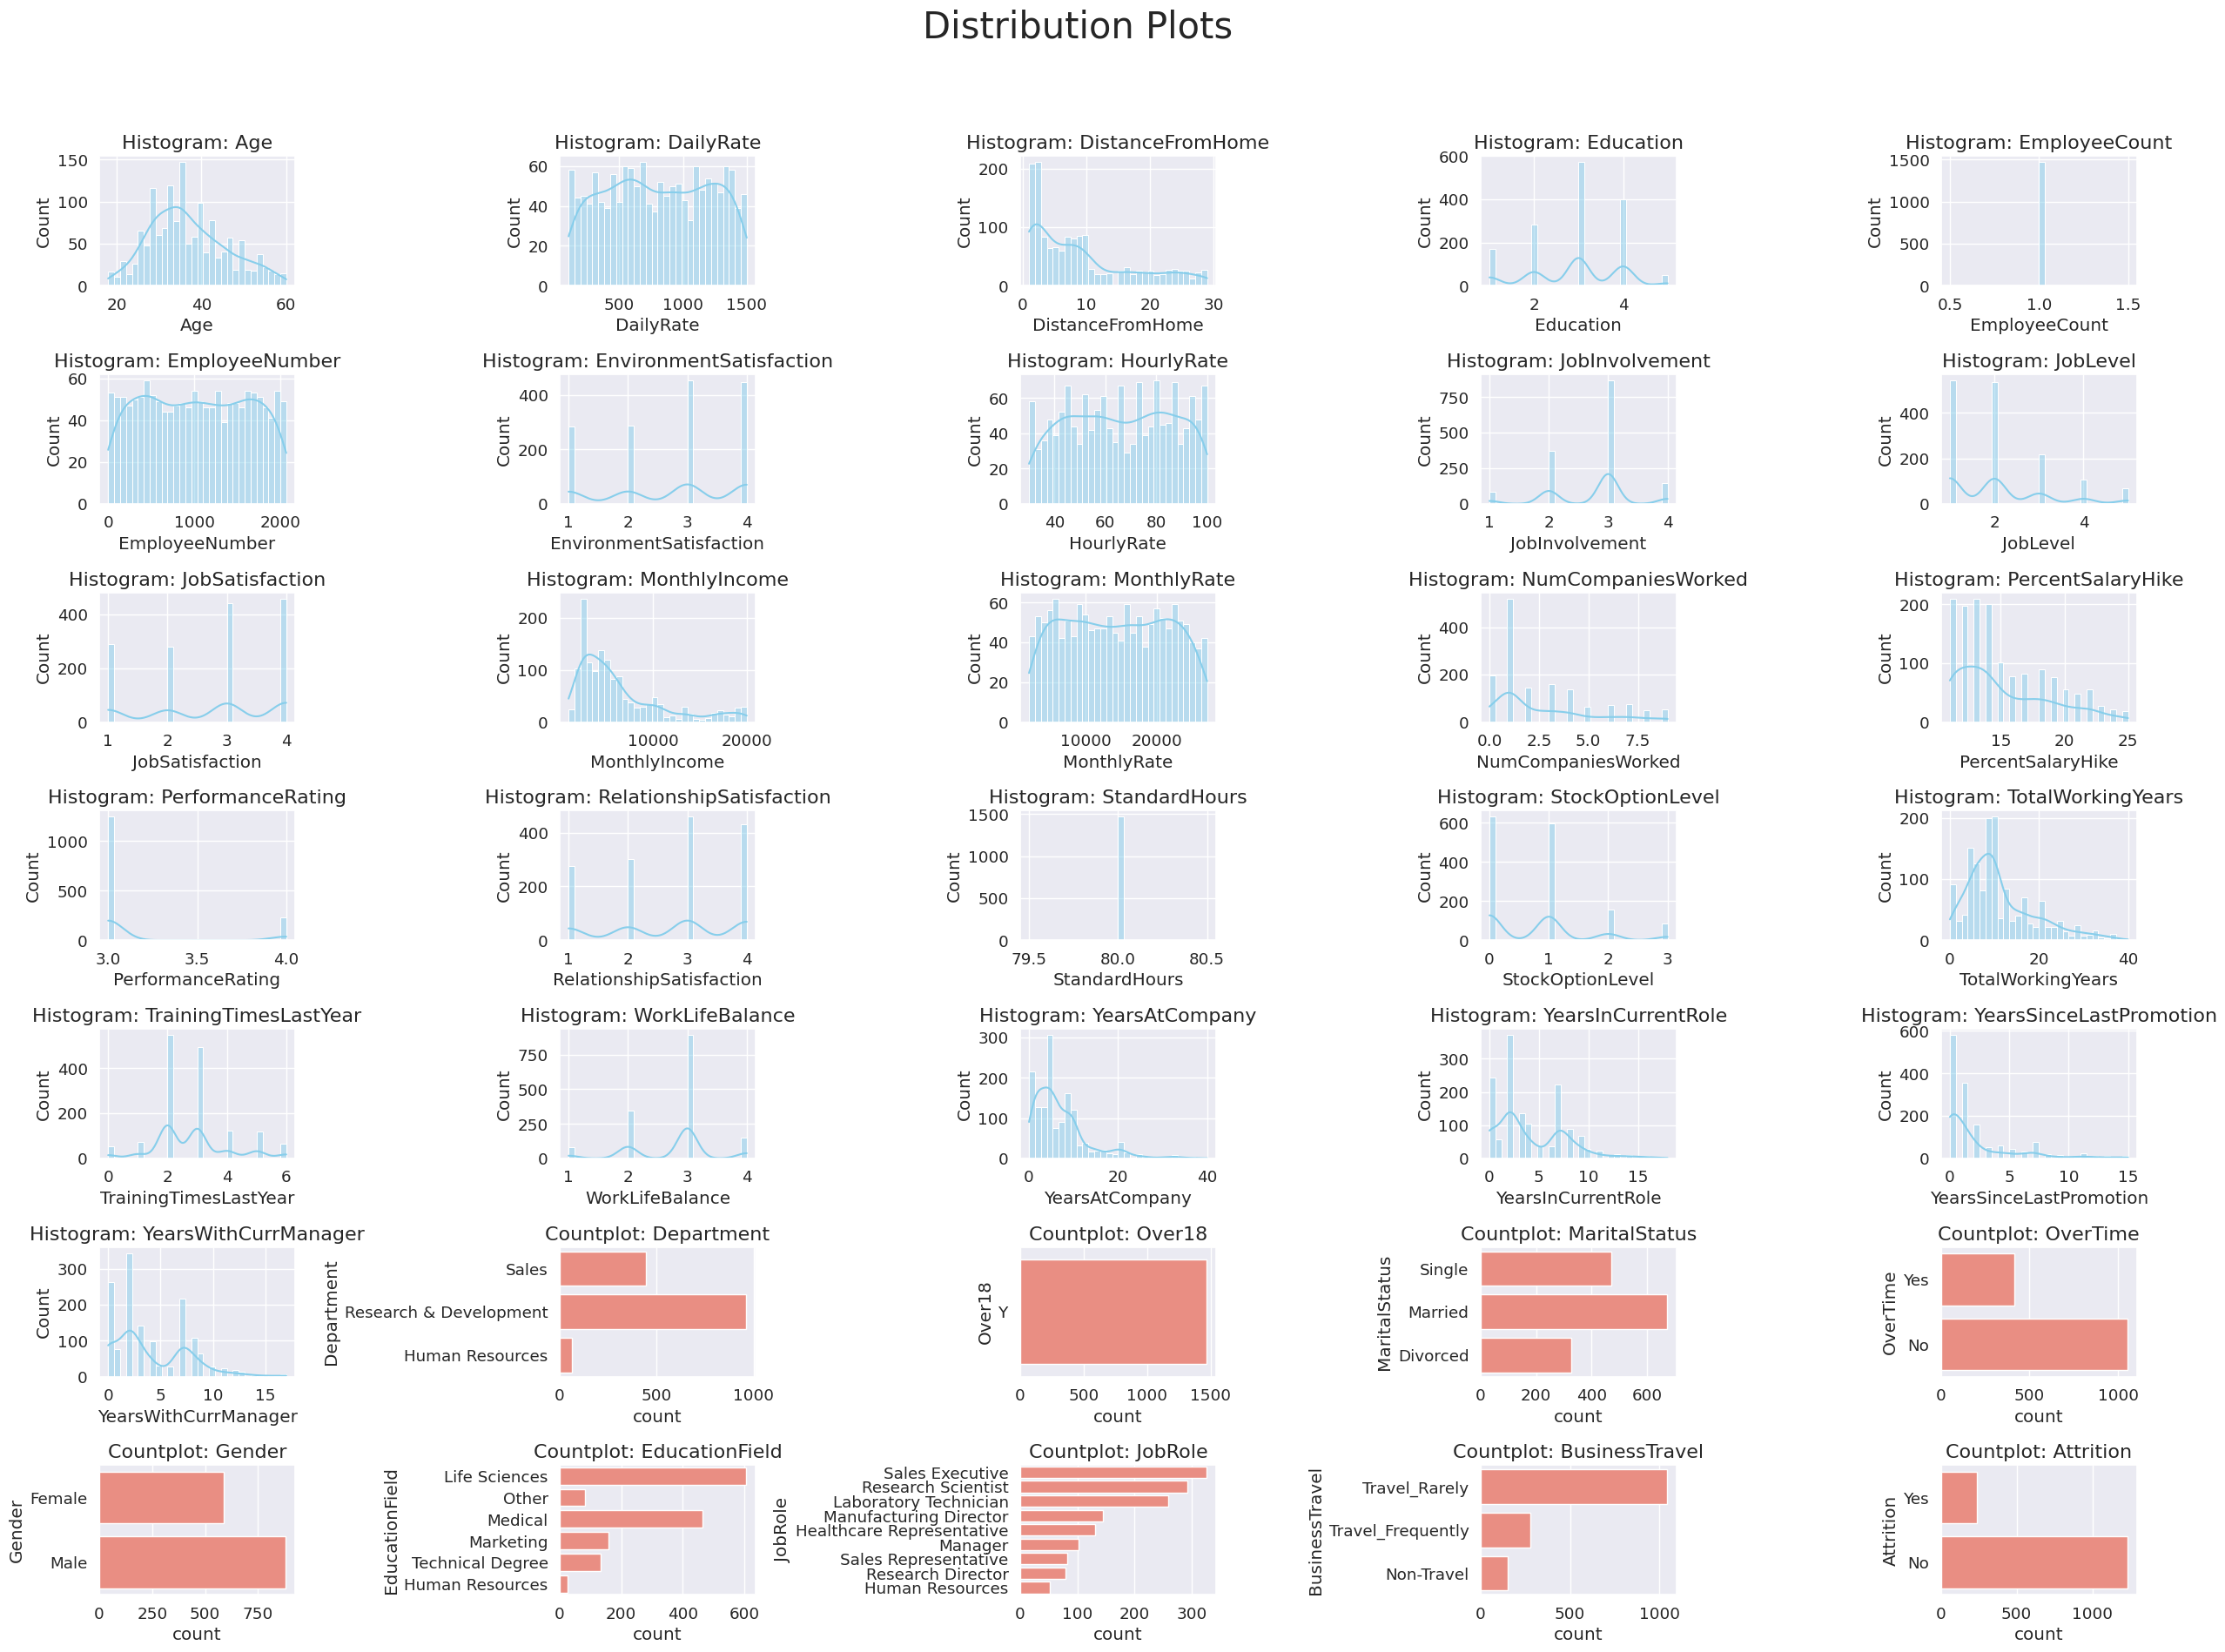

In [ ]:
fig, axs = plt.subplots(nrows=7, ncols=5, figsize=(25, 20))
fig.suptitle('Distribution Plots', fontsize=30)

axs = axs.flatten()

for i, var in enumerate(numerical_vars):
    sns.histplot(data[var], ax=axs[i], kde=True, color='skyblue', bins=30)
    axs[i].set_title(f'Histogram: {var}', fontsize=16)

non_numerical_vars = list(set(data.columns) - set(numerical_vars))
for i, var in enumerate(non_numerical_vars):
    sns.countplot(data[var], ax=axs[i + len(numerical_vars)], color='salmon')
    axs[i + len(numerical_vars)].set_title(f'Countplot: {var}', fontsize=16)

for i in range(len(numerical_vars) + len(non_numerical_vars), len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

In [ ]:
# 파생변수 생성 (업무 기여도)
# 얼마나 오래, 얼마나 열심히, 얼마나 수준 높은 업무에 참여했는지를 나타내는 지표

def contribution(involvement, joblevel, workingyear):
  involvement = 1 / (5 - involvement) #very high = 1, high = 0.75, medium = 0.5, low = 0.25
  return involvement * joblevel * workingyear

data['working_contribution'] = data.apply(lambda x: contribution(x['JobInvolvement'], x['JobLevel'], x['YearsAtCompany']), axis=1)

numerical_vars.append('working_contribution')

data['working_contribution']

0        6.000000
1        6.666667
2        0.000000
3        4.000000
4        1.000000
          ...    
1465    10.000000
1466     7.000000
1467    12.000000
1468     6.000000
1469     8.000000
Name: working_contribution, Length: 1470, dtype: float64

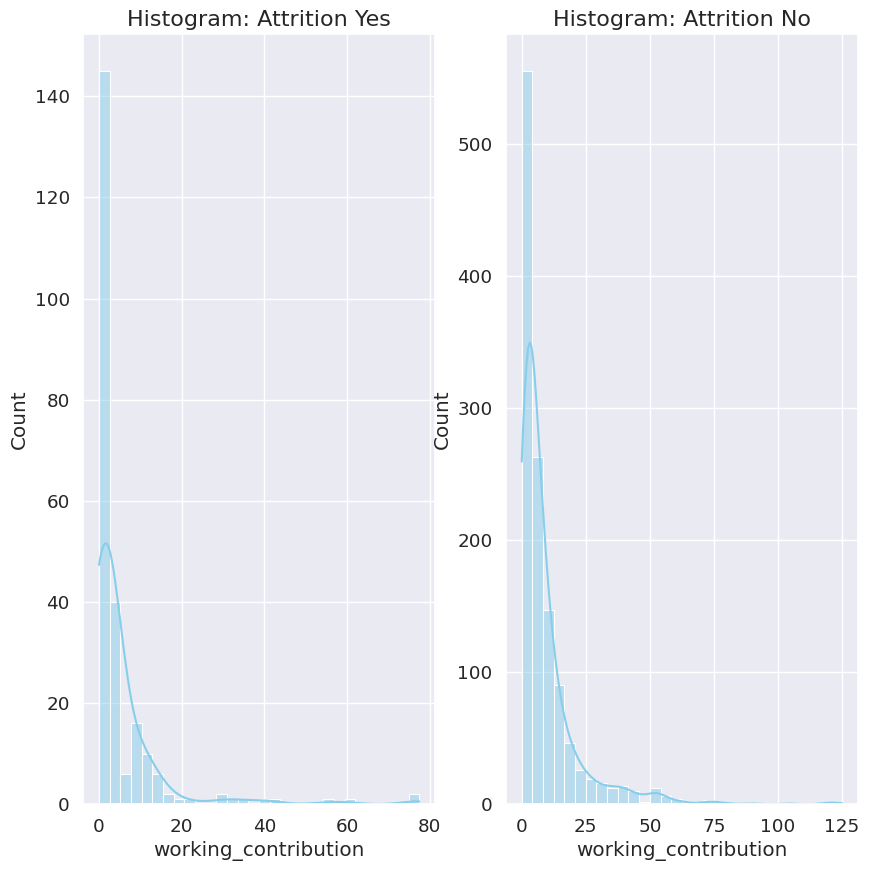

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
sns.histplot(data[data['Attrition'] == 'Yes']['working_contribution'], ax = ax[0], kde=True, color='skyblue', bins=30)
sns.histplot(data[data['Attrition'] == 'No']['working_contribution'], ax = ax[1], kde=True, color='skyblue', bins=30)

ax[0].set_title(f'Histogram: Attrition Yes', fontsize=16)
ax[1].set_title(f'Histogram: Attrition No', fontsize=16)

plt.show()